In [2]:
# Imports and path definitions

import sys
import os
import plotly.plotly as py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from itertools import combinations

path = os.getcwd() + '/'

In [2]:
#
##
### Functions
##
#
def pend(l_real, l_imag, l_projections, n):
    g = float(7)/6
    beta = 0.46686
    l_mj = []
    
    for i in l_projections:
        vec = i.split('/')
        l_mj.append(float(vec[0]))
    l = list(range(0,n))
    coef_l = []
    
    for i in l:
        x = complex(float(l_real[i]), float(l_imag[i]))    # complex
        coef_i = g*beta*(abs(x)**2)*l_mj[i]  # complex
        coef_l.append(coef_i)
    coef = sum(coef_l)
    
    return coef#, coef_l


def compare_pend(d_pends, d_eigenvectors): #d_eigenvalues
    d_dif = {}
    d_uniq = {}
    lim = 10**(-3)
    
        
    for a, b in combinations(d_pends, 2):
        #difE != 0
        # continue
        if d_eigenvectors[a] != d_eigenvectors[b]:
            value = abs(d_pends[a]- d_pends[b])

            if value < lim:
                d_dif[a + b] = value
    
    return d_dif


def sderivative(pend1, pend2, field1, field2):
    value = (float(pend1) - float(pend2)) / (float(campo1) - float(pend2))



In [3]:

#
## Parsing input file 'simpre.par'
#
with open(path + 'simpre.par', 'r') as par_f:
    for i in par_f:
        if 'fieldstart' in i:
            fieldstart = float(i[19 + len('fieldstart'):18 + len('fieldstart')+ 7])
        elif 'fieldend' in i:
            fieldend = float(i[19 + len('fieldend'):18 + len('fieldend')+ 7])
        elif 'fieldstep' in i:
            fieldstep = float(i[19 + len('fieldstep'):18 + len('fieldstep')+ 8])
par_f.close()


#
## Parsing input file 'simpre.out'
#
with open(path + 'simpre.out', 'r') as f:
    lines = f.read().split('\n')

c = 0
d_H = {}
H_values = []
d_eivec_pos = {}

for i in lines:
    c+=1
    if 'Magnetic Field' in i:
        vec = i.split()
        H = vec[4]
        H_values.append(H)
        d_H[H] = c
        
    elif 'Eigenvectors' in i:
        d_eivec_pos[H] = c




#
##
### Main loop
##
#
out_f1 = open(path + 'global.out', 'w')
out_f3 = open(path + 'pends.out', 'w')
out_f3.write('H_value\t')

for i in list(range(1,tot_lvls+1)):
    out_f3.write('lvl_' + str(i) + '\t')
out_f3.write('\n')



c2 = 0
for i in H_values:
    c2 += 1
    out_f1.write('#################################################\n')
    out_f1.write('## Magnetic Field value = ' + str(i) + '\n')
    out_f1.write('#################################################\n\n')
    out_f1.write('## tag   EigValues   SpinProjections   pend   EigVect(R I)\n')
    
    out_f2 = open(path + 'temp_' + str(c2) + '.out', 'w')
    out_f2.write('#################################################\n')
    out_f2.write('## Magnetic Field value = ' + str(i) + '\n')
    out_f2.write('#################################################\n\n')
    out_f2.write('## tag   EigValues   SpinProjections   pend   EigVect(R I)\n')
    
    out_f3.write(str(i) + '\t')
    
    
    d_eigenvalues = {}
    d_eigenvectors = {}
    d_pend = {}
    l_pend = []
    
    eigenvalues_list = lines[(d_H[i] + 18) : (d_H[i] + 44) ] # 18 y 44 son valores fijos 
    
    for i2 in eigenvalues_list:
        vec = i2.split()
        d_eigenvalues['lvl_' + str(vec[3])] = vec[0]
        
    eigenvectors_list = lines[d_eivec_pos[i] : d_eivec_pos[i] + tot_lvls] # tot_lvls valor variable
    
    c3 = 0
    for i3 in eigenvectors_list:
        c3 += 1
        d_eigenvectors['lvl_' + str(c3)] = i3
        
        
    for i4 in d_eigenvectors:
        vec = d_eigenvectors[i4].split()
        c_real =  vec[0::2]
        c_imag = vec[1::2]

        pend_i = pend(c_real, c_imag, projections_l,tot_lvls)
        d_pend[str(i4)] = pend_i
        l_pend.append(pend_i)
        
    
    
    ## Condition 1 : discriminates degeneracy and calculates difference between pends
    d_diffs = compare_pend(d_pend, d_eigenvalues)
    
    
    
    #### Writing temp_f and global .out
    for i in list(range(1,tot_lvls+1)):
        tag = 'lvl_' + str(i)
        out_f1.write(tag + ' ' + str(d_eigenvalues[tag]) + ' ' +  str(projections_l[i-1])
                    + ' ' + str(d_pend[tag]) + ' ' + str(d_eigenvectors[tag]) +  '\n')  # Falta Col [0/1] compare pend
        out_f2.write(tag + ' ' + str(d_eigenvalues[tag]) + ' ' +  str(projections_l[i-1])
                    + ' ' + str(d_pend[tag]) + ' ' + str(d_eigenvectors[tag]) +  '\n')  # Falta Col [0/1] compare pend
        
        out_f3.write(str(d_pend[tag]) + '\t')
    
    out_f1.write('\n\n\n')
    out_f1.write('## Differences map\n')
    out_f1.write('\n\n\n')
    
    out_f2.write('\n\n\n')
    out_f2.write('## Differences map\n')
    
    for i in d_diffs:
        out_f1.write(i + ' ' + str(d_diffs[i]) + '\n')
        out_f2.write(i + ' ' + str(d_diffs[i]) + '\n')
    
    out_f2.close()
    
    out_f3.write('\n')
    
    ## Break
    if c2 == 27:
        break


out_f1.close()
out_f3.close()


#
## Pends file
#

with open(path + 'pends.out', 'r') as pends_f:
    l = range(0,27)
    data = pd.read_csv(pends_f, sep='\t', header=0, index_col=0, dtype=float, usecols=l)

#print data


if 0.0 in data.index:
    print 'Si'
    data = data.drop([0.0])

# NEW APPROACH

** Pre analysis -- hiperfino = 0 -- control soble niveles
~ Parallel and isotrope hyperfine
Polinomios de intervalos  5/3 puntos de H

1. Run your simpre calculation and plot your results.
2. Define a trainning data set region without non-avoided crossings
    - Minimum of 3-5 points (plot your results)
3. Run Poly.py 
4. Run expected_values.py
5. Run main.py

n. of points: 206


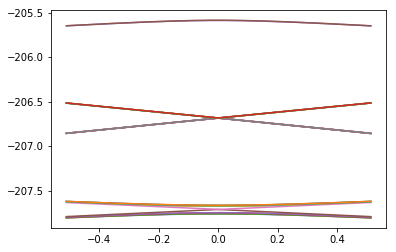

In [5]:
ene_f = path + "simpre.ene"

ene = np.loadtxt(ene_f, dtype= float)

#plt.plot(ene[:,0], ene[:,[22,23,24]])
plt.plot(ene[:,0], ene[:,1:])
#plt.savefig('plot_ene.png', dpi = 300)

print 'n. of points: ' + str(len(ene))
plt.show()


n. of points: 412


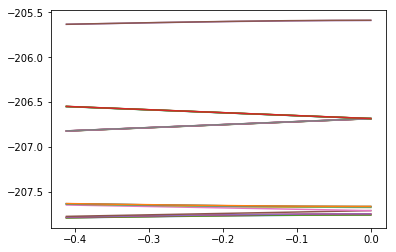

In [6]:
#
## Trainning data set
#

ene_prev_f = path + "simpre_prev.ene"
ene_prev = np.loadtxt(ene_prev_f, dtype= float)

#plt.plot(ene_prev[:,0], ene_prev[:,[1,2,3,4,5,6]])
plt.plot(ene_prev[:,0], ene_prev[:,1:])
#plt.savefig('plot_prev.png', dpi = 300)

print 'n. of points: ' + str(len(ene_prev))
plt.show()

In [94]:
#
## Functions module
#

def poly(five_H, five_E): #dataset with set of points: would retrieve 
    #print five_E
    #print five_H
    x = five_H # set campos H (5)
    y = five_E # set valores E (5)
        
    vec_z = np.polyfit(x, y, deg = 2)
    return vec_z
    
    #poli_out = open(path + 'poli.out', 'w')
    #poli_out.write('name\tk0\tk1\tk2\n')
    #poli_out.write(i + '\t' + str(k0) + '\t' + str(k1) + '\t' + str(k2))
    #poli_out.write('\n')
    #poli_out.close()


def expected_E(vec_z, H_v):
    k0 = vec_z[2]
    k1 = vec_z[1]
    k2 = vec_z[0]
    predicted_E = (k2 * (float(H_v)**2)) + (k1 * float(H_v)) + k0
    v = '%.6f' % predicted_E
    return v
    #expec_out.write(str(v) + '\t')


In [8]:
#
## Initial definitions
#

# Defined by the user so far; automatize for the future
J = float(6)
I = float(0.5)

# Lists
tot_lvls = int((2*J + 1)*(2*I + 1))
m_j = list(range(int(-(2*J)), int((2*J+2)), int(2)))
m_i = list(range(int(-(2*I)), int((2*I+2)), int(2)))

lvls_list = []
for i in list(range(np.size(ene, axis=1)-1)):
    lvls_list.append('lvl_'+ str(i+1))

## Generate projections list from m_j and m_i
projections_l = []
for j in m_j:
    for i in m_i:
        proj = str(j) + '/' + str(i)
        projections_l.append(proj)


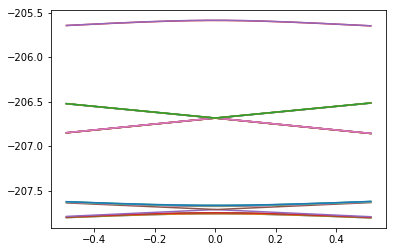

              lvl_1        lvl_2        lvl_3        lvl_4        lvl_5  \
-0.511          NaN          NaN          NaN          NaN          NaN   
-0.506          NaN          NaN          NaN          NaN          NaN   
-0.501          NaN          NaN          NaN          NaN          NaN   
-0.496          NaN          NaN          NaN          NaN          NaN   
-0.491  -207.803828  -207.802569  -207.801630  -207.797736  -207.795762   
-0.486  -207.803161  -207.801890  -207.800955  -207.797021  -207.795053   
-0.481  -207.802497  -207.801213  -207.800282  -207.796308  -207.794345   
-0.476  -207.801835  -207.800539  -207.799610  -207.795596  -207.793639   
-0.471  -207.801175  -207.799866  -207.798941  -207.794886  -207.792934   
-0.466  -207.800517  -207.799196  -207.798275  -207.794177  -207.792232   
-0.461  -207.799862  -207.798527  -207.797610  -207.793470  -207.791530   
-0.456  -207.799209  -207.797861  -207.796947  -207.792764  -207.790831   
-0.451  -207.798558  -207

In [101]:
# Evaluate expected values

plt.plot(expected_df.index, expected_df.iloc[:,1:])
#plt.savefig('plot_prev.png', dpi = 300)

#print 'n. of points: ' + str(len(ene_prev))
plt.show()
print expected_df

In [156]:
#
##
### Loading datasets
##
#

# Loads polynomios file
#with open(path + 'poli.out', 'r') as poli_f:
#    poli_df = pd.read_csv(poli_f, sep='\t', header=0, index_col=0)#, dtype=float)


# Loads new 'simpre.ene' file with energies of each level (quantum number) at diff H field
with open(path + 'simpre.ene', 'r') as ene_f:
    ene = np.loadtxt(ene_f, dtype= float)
    ene_df = pd.DataFrame(data=ene[0:,1:],  index=ene[0:,0] , columns=lvls_list)

if float(0.0) in ene_df.index:
    ene_df = ene_df.drop([0.0])
    


# Creating an empty DF for further lvl ordering
H_values = ene_df.index
order_df = pd.DataFrame(index=H_values, columns=lvls_list)
expected_df = pd.DataFrame(index=H_values, columns=lvls_list)
final_df = pd.DataFrame(index=H_values, columns=lvls_list)


# Open out files
expec_out = open('expected_values.out', 'w')
poli_out = open('poli.out', 'w')

#
##
### Main loop
##
#

for i0 in lvls_list:
    #print i0
    c0 = 0
    c1=0
    five_E = []
    five_H = []
    
    poli_out.write(i0 + '\n' )
    
    for i1 in H_values:
       # print i1
        c0 += 1
        c1 += 1     
        
        five_H.append(i1)
        five_E.append(ene_df.loc[i1, i0])
        
        if c0 ==5:
            
            # Fitting
            vec_poly = poly(five_H, five_E)
            p = np.poly1d(vec_poly)
            poli_out.write('H: ' + str(H_values[c1-1]) + ' ' + str(p) +'\n') #+ ' ' + five_H + ' ' + five_E + '\n')
            
            # Calculate expected_v
            expected_v = float(expected_E(vec_poly, H_values[c1-1]))
            v = '%.6f' % expected_v
            expected_df.loc[i1, i0] = v
            
            
            # Search expected values in ene_df
            e1 = '%.6f' % ene_df.loc[i1, i0]
            if v == e1:
                order_df.loc[i1, i0] = i0.replace('lvl_', '')
            
            else: ### time to re-order!!
                order_df.loc[i1, i0] = 'no'
                print v
                c3 = 0
                for i in ene_df.loc[i1]:
                    c3 +=1
                    i = '%.6f' % i
                    if i == v:
                        print c3
                    
            
            
            c0 = c0-1
            five_E.pop(0)
            five_H.pop(0)
    
    poli_out.write('\n')
#print expected_df

order_df.to_csv(path + 'order.txt', header = lvls_list, sep=' ', na_rep='na')
    
## Condition 1 : compare pends (k1)
   
## Condition 2 : compare second derivative (k2)
    
## Condition 3 : allowed/non-allowed transitions (+/- 1) 
expec_out.close()
poli_out.close()

-207.758450
-207.758518
-207.758440
-207.758467
-207.748155
-207.748266
-207.748341
-207.748128
-207.748137
-207.748172
-207.712606
-207.714409
-207.715095
-207.711650
-207.709848
-207.709164
-207.675631
-207.675619
-207.675584
-207.675606
-207.675500
-207.675429
-207.666815
-207.666786
-207.666805
-207.666740
-206.687445
-206.691323
-206.692798
-206.686825
-206.690698
-206.692172
-206.686033
-206.686414
-206.688207
-206.690086
-206.691673
-206.685533
-206.685943
-206.687753
-206.689635
-206.691211
-206.685378
-206.685635
-206.687360
-206.689228
-206.690860
-206.685061
-206.685336
-206.687073
-206.688945
-206.690572
-206.685056
-206.685091
-206.683522
-206.681680
-206.679943
-206.684850
-206.684592
-206.682865
-206.680997
-206.679368
-206.684587
-206.684134
-206.682301
-206.680416
-206.678858
-206.684402
-206.683754
-206.681816
-206.679914
-206.678428
-206.684081
-206.683394
-206.681435
-206.679529
-206.678056
-206.683106
-206.679233
-206.677761
-205.586926
-205.587016


In [141]:
print expected_df.iloc[100,5:7]
print ene_df.iloc[100,5:7]
l = ['lvl_1', 'lvl_2']
for i in order_df.loc[l]:
    print i

lvl_6    -207.713830
lvl_7    -207.710427
Name: -0.01099998, dtype: object
lvl_6   -207.713830
lvl_7   -207.710427
Name: -0.01099998, dtype: float64


KeyError: u"None of [['lvl_1', 'lvl_2']] are in the [index]"

In [14]:
#print order_df

ene_df = np.array(ene_df)
order_df = np.array(order_df)

dims = ene_df.shape
print dims
tsize = dims[0]*dims[1]


#Recreate the ene_df array using the labels from order_df as a mask

df_final = np.arange(tsize).reshape(dims[0], dims[1])
df_final = np.array(df_final, dtype='float32')

for i in range(dims[0]):
    for j in range(dims[1]):
        label = int(order_df[i,j])
        i = int(i)
        j = int(j)
        if label == j+1:
            df_final[i,j] = ene_df[i,j]
        else:
            df_final[i,j] = ene_df[i,label-1] 
        

df_final = pd.DataFrame(df_final)
df_final.to_csv(path + 'final.txt', header = lvls_list, sep='\t', na_rep='na')

(206, 26)
             0           1           2           3           4           5   \
0   -207.806519 -207.805298 -207.804352 -207.800613 -207.798615 -207.791962   
1   -207.805832 -207.804611 -207.803665 -207.799896 -207.797897 -207.791183   
2   -207.805161 -207.803925 -207.802979 -207.799164 -207.797180 -207.790390   
3   -207.804489 -207.803253 -207.802307 -207.798447 -207.796478 -207.789597   
4   -207.803833 -207.802567 -207.801636 -207.797729 -207.795761 -207.788818   
5   -207.803162 -207.801895 -207.800949 -207.797028 -207.795059 -207.788025   
6   -207.802490 -207.801208 -207.800278 -207.796310 -207.794342 -207.787231   
7   -207.801834 -207.800537 -207.799606 -207.795593 -207.793640 -207.786453   
8   -207.801178 -207.799866 -207.798935 -207.794891 -207.792938 -207.785660   
9   -207.800522 -207.799194 -207.798279 -207.794174 -207.792236 -207.784866   
10  -207.799866 -207.798523 -207.797607 -207.793472 -207.791534 -207.784088   
11  -207.799210 -207.797867 -207.796951 -2

In [98]:
#
##
### Slope calculation module from eigenvalues and eigenvectors
##
#

#
## Parsing input file 'simpre.out'
#
with open(path + 'simpre.out', 'r') as f:
    lines = f.read().split('\n')


out_f1 = open(path + 'global.out', 'w')
out_f3 = open(path + 'pends.out', 'w')
out_f3.write('H_value\t')

for i in list(range(1,tot_lvls+1)):
    out_f3.write('lvl_' + str(i) + '\t')
out_f3.write('\n')


d_H = {}
H_values = []
d_eivec_pos = {}


c = 0
for i in lines:
    c+=1
    if 'Magnetic Field' in i:
        vec = i.split()
        H = vec[4]
        H_values.append(H)
        d_H[H] = c
        
    elif 'Eigenvectors' in i:
        d_eivec_pos[H] = c


c2 = 0
for i in H_values:
    c2 += 1
    out_f1.write('#################################################\n')
    out_f1.write('## Magnetic Field value = ' + str(i) + '\n')
    out_f1.write('#################################################\n\n')
    out_f1.write('## tag   EigValues   SpinProjections   pend   EigVect(R I)\n')
    
    out_f2 = open(path + 'temp_' + str(c2) + '.out', 'w')
    out_f2.write('#################################################\n')
    out_f2.write('## Magnetic Field value = ' + str(i) + '\n')
    out_f2.write('#################################################\n\n')
    out_f2.write('## tag   EigValues   SpinProjections   pend   EigVect(R I)\n')
    
    out_f3.write(str(i) + '\t')
    
    
    d_eigenvalues = {}
    d_eigenvectors = {}
    d_pend = {}
    l_pend = []
    
    eigenvalues_list = lines[(d_H[i] + 18) : (d_H[i] + 44) ] # 18 y 44 son valores fijos 
    
    for i2 in eigenvalues_list:
        vec = i2.split()
        d_eigenvalues['lvl_' + str(vec[3])] = vec[0]
        
    eigenvectors_list = lines[d_eivec_pos[i] : d_eivec_pos[i] + tot_lvls] # tot_lvls valor variable
    
    c3 = 0
    for i3 in eigenvectors_list:
        c3 += 1
        d_eigenvectors['lvl_' + str(c3)] = i3
        
    
    
    #
    ## Calculates slopes
    #
    for i4 in d_eigenvectors:
        vec = d_eigenvectors[i4].split()
        c_real =  vec[0::2]
        c_imag = vec[1::2]

        pend_i = pend(c_real, c_imag, projections_l,tot_lvls)
        d_pend[str(i4)] = pend_i
        l_pend.append(pend_i)
        

    ## Condition 1 : discriminates degeneracy and calculates difference between pends
    d_diffs = compare_pend(d_pend, d_eigenvalues)
    
    
    
    #### Writing temp_f and global .out
    for i in list(range(1,tot_lvls+1)):
        tag = 'lvl_' + str(i)
        out_f1.write(tag + ' ' + str(d_eigenvalues[tag]) + ' ' +  str(projections_l[i-1])
                    + ' ' + str(d_pend[tag]) + ' ' + str(d_eigenvectors[tag]) +  '\n')  # Falta Col [0/1] compare pend
        out_f2.write(tag + ' ' + str(d_eigenvalues[tag]) + ' ' +  str(projections_l[i-1])
                    + ' ' + str(d_pend[tag]) + ' ' + str(d_eigenvectors[tag]) +  '\n')  # Falta Col [0/1] compare pend
        
        out_f3.write(str(d_pend[tag]) + '\t')
    
    
    
    out_f1.write('\n\n\n')
    out_f1.write('## Differences map\n')
    out_f1.write('\n\n\n')
    
    out_f2.write('\n\n\n')
    out_f2.write('## Differences map\n')
    
    for i in d_diffs:
        out_f1.write(i + ' ' + str(d_diffs[i]) + '\n')
        out_f2.write(i + ' ' + str(d_diffs[i]) + '\n')
    
    out_f2.close()
    
    out_f3.write('\n')
    
    
    
    ## Break
    if c2 == 47:
        break



out_f1.close()
out_f3.close()

